# Goodreads Spoilers

#### These datasets contain reviews from the Goodreads book review website, along with annotated "spoiler" information from each review. This dataset contains more than 1.3M book reviews about 25,475 books and 18,892 users.

In [28]:
import pandas as pd
import json
import matplotlib.pyplot as plt

#### --> Fetching the JSON file & reading its data line-by-line and appending it into json_list & finally sending it into a dataframe which in turn stores all data inside "df"

In [29]:
# set the path to the JSON file
path = 'goodreads_reviews_spoiler.json'

# create an empty list to store the JSON objects
json_list = []

# read the JSON file line by line
with open(path, 'r') as f:
    for line in f:
        # load each line as a JSON object
        json_obj = json.loads(line)
        # append the JSON object to the list
        json_list.append(json_obj)

# create a DataFrame from the list of JSON objects
df = pd.DataFrame(json_list)

In [30]:
df.head(100)

,user_id,timestamp,review_sentences,rating,has_spoiler,book_id,review_id
0,8842281e1d1347389f2ab93d60773d4d,2017-08-30,"[[0, This is a special book.], [0, It started ...",5,True,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb
1,8842281e1d1347389f2ab93d60773d4d,2017-03-22,"[[0, Recommended by Don Katz.], [0, Avail for ...",3,False,16981,a5d2c3628987712d0e05c4f90798eb67
2,8842281e1d1347389f2ab93d60773d4d,2017-03-20,"[[0, A fun, fast paced science fiction thrille...",3,True,28684704,2ede853b14dc4583f96cf5d120af636f
3,8842281e1d1347389f2ab93d60773d4d,2016-11-09,"[[0, Recommended reading to understand what is...",0,False,27161156,ced5675e55cd9d38a524743f5c40996e
4,8842281e1d1347389f2ab93d60773d4d,2016-04-25,"[[0, I really enjoyed this book, and there is ...",4,True,25884323,332732725863131279a8e345b63ac33e
...,...,...,...,...,...,...,...
95,01ec1a320ffded6b2dd47833f2c8e4fb,2017-07-23,"[[0, 3.5 - 4 stars], [0, Beautiful and poignan...",4,False,35275234,4c7feecc438639b41c45ae4b8e7ae97c
96,01ec1a320ffded6b2dd47833f2c8e4fb,2017-09-15,"[[0, 4.5 - 5 Stars!], [0, ""When life happened,...",5,False,35342904,f246ef8741bcbd9969e3d0cf6b622464
97,01ec1a320ffded6b2dd47833f2c8e4fb,2017-07-01,"[[0, 4.5 Captivating Stars!!], [0, ""When truth...",5,False,32054095,8c742bb67025d7e152f04793e46c34a3
98,01ec1a320ffded6b2dd47833f2c8e4fb,2017-05-30,"[[0, Such a sweet and sexy story!], [0, Highly...",4,False,34321642,735f52a6301fc855fadf081b5df10dd4


In [31]:
df['review_sentences']

0          [[0, This is a special book.], [0, It started ...
1          [[0, Recommended by Don Katz.], [0, Avail for ...
2          [[0, A fun, fast paced science fiction thrille...
3          [[0, Recommended reading to understand what is...
4          [[0, I really enjoyed this book, and there is ...
                                 ...                        
1378028    [[0, Can't wait for Travis' POV], [0, Travis B...
1378029    [[0, Had this on my to-read shelf forever.], [...
1378030    [[0, The last book left me wanting for more.],...
1378031    [[0, Things are heating up in the second novel...
1378032    [[0, Before I even start this review, I must s...
Name: review_sentences, Length: 1378033, dtype: object

#### --> Removing 0 from review sentences & seperating two review sentences 

In [32]:
df['first_sentence'] = df['review_sentences'].apply(lambda x: x[0] if len(x)>0 else None)
df['second_sentence'] = df['review_sentences'].apply(lambda x: x[1] if len(x)>1 else None)


df.drop('review_sentences', axis=1, inplace=True)

print(df.head())




                            user_id   timestamp  rating  has_spoiler  \
0  8842281e1d1347389f2ab93d60773d4d  2017-08-30       5         True   
1  8842281e1d1347389f2ab93d60773d4d  2017-03-22       3        False   
2  8842281e1d1347389f2ab93d60773d4d  2017-03-20       3         True   
3  8842281e1d1347389f2ab93d60773d4d  2016-11-09       0        False   
4  8842281e1d1347389f2ab93d60773d4d  2016-04-25       4         True   

    book_id                         review_id  \
0  18245960  dfdbb7b0eb5a7e4c26d59a937e2e5feb   
1     16981  a5d2c3628987712d0e05c4f90798eb67   
2  28684704  2ede853b14dc4583f96cf5d120af636f   
3  27161156  ced5675e55cd9d38a524743f5c40996e   
4  25884323  332732725863131279a8e345b63ac33e   

                                      first_sentence  \
0                       [0, This is a special book.]   
1                      [0, Recommended by Don Katz.]   
2   [0, A fun, fast paced science fiction thriller.]   
3  [0, Recommended reading to understand what is

#### --> Removing Unnecessary columns timestamp & review_id

In [33]:
df.drop(['review_id'], axis=1, inplace=True)


In [34]:
df.head()

,user_id,timestamp,rating,has_spoiler,book_id,first_sentence,second_sentence
0,8842281e1d1347389f2ab93d60773d4d,2017-08-30,5,True,18245960,"[0, This is a special book.]","[0, It started slow for about the first third,..."
1,8842281e1d1347389f2ab93d60773d4d,2017-03-22,3,False,16981,"[0, Recommended by Don Katz.]","[0, Avail for free in December: http://www.aud..."
2,8842281e1d1347389f2ab93d60773d4d,2017-03-20,3,True,28684704,"[0, A fun, fast paced science fiction thriller.]","[0, I read it in 2 nights and couldn't put it ..."
3,8842281e1d1347389f2ab93d60773d4d,2016-11-09,0,False,27161156,"[0, Recommended reading to understand what is ...","[0, http://www.npr.org/2016/11/09/5013826...]"
4,8842281e1d1347389f2ab93d60773d4d,2016-04-25,4,True,25884323,"[0, I really enjoyed this book, and there is a...","[0, It did drag on a little at the end so I kn..."


#### --> dropping book_id 

In [35]:
df.drop('book_id', axis=1, inplace=True)

In [36]:
df.head()

,user_id,timestamp,rating,has_spoiler,first_sentence,second_sentence
0,8842281e1d1347389f2ab93d60773d4d,2017-08-30,5,True,"[0, This is a special book.]","[0, It started slow for about the first third,..."
1,8842281e1d1347389f2ab93d60773d4d,2017-03-22,3,False,"[0, Recommended by Don Katz.]","[0, Avail for free in December: http://www.aud..."
2,8842281e1d1347389f2ab93d60773d4d,2017-03-20,3,True,"[0, A fun, fast paced science fiction thriller.]","[0, I read it in 2 nights and couldn't put it ..."
3,8842281e1d1347389f2ab93d60773d4d,2016-11-09,0,False,"[0, Recommended reading to understand what is ...","[0, http://www.npr.org/2016/11/09/5013826...]"
4,8842281e1d1347389f2ab93d60773d4d,2016-04-25,4,True,"[0, I really enjoyed this book, and there is a...","[0, It did drag on a little at the end so I kn..."


#### --> Setting has_spoiler from "True" & "False" to 0 or 1

In [37]:
df['has_spoiler'] = df['has_spoiler'].map({True: 1, False: 0})

In [38]:
df.head()

,user_id,timestamp,rating,has_spoiler,first_sentence,second_sentence
0,8842281e1d1347389f2ab93d60773d4d,2017-08-30,5,1,"[0, This is a special book.]","[0, It started slow for about the first third,..."
1,8842281e1d1347389f2ab93d60773d4d,2017-03-22,3,0,"[0, Recommended by Don Katz.]","[0, Avail for free in December: http://www.aud..."
2,8842281e1d1347389f2ab93d60773d4d,2017-03-20,3,1,"[0, A fun, fast paced science fiction thriller.]","[0, I read it in 2 nights and couldn't put it ..."
3,8842281e1d1347389f2ab93d60773d4d,2016-11-09,0,0,"[0, Recommended reading to understand what is ...","[0, http://www.npr.org/2016/11/09/5013826...]"
4,8842281e1d1347389f2ab93d60773d4d,2016-04-25,4,1,"[0, I really enjoyed this book, and there is a...","[0, It did drag on a little at the end so I kn..."


#### --> Counting the number of users who gave spoilers in the review & who didn't gave spoilers in the review

In [39]:
print("Users who gave No Spoiler in their Reviews", df[df['has_spoiler']==0].count())
print("Users who gave Spoiler in their Reviews", df[df['has_spoiler']==1].count())

Users who gave No Spoiler in their Reviews user_id            1288406
timestamp          1288406
rating             1288406
has_spoiler        1288406
first_sentence     1288406
second_sentence    1178249
dtype: int64
Users who gave Spoiler in their Reviews user_id            89627
timestamp          89627
rating             89627
has_spoiler        89627
first_sentence     89627
second_sentence    89364
dtype: int64


### -- Total User Count is 1378033
#### -- Total number of users who didn't gave spoilers are 1288406 ,
#### -- Users who gave spoilers are 89627, 

In [40]:
df.count()

user_id            1378033
timestamp          1378033
rating             1378033
has_spoiler        1378033
first_sentence     1378033
second_sentence    1267613
dtype: int64

In [41]:
df.shape

(1378033, 6)

In [42]:
print(f"Total number of users: {len(set(df['user_id']))}")

Total number of users: 18892


#### --> Counting Number of users who have given a rating, Number of users who have given spoilers, Number of users who have not given spoilers & Number of users who left no reviews at all

In [43]:
num_users_with_rating = len(set(df['user_id']))
print(f"Number of users who have given a rating: {num_users_with_rating}")

num_users_with_spoilers = len(set(df[df['has_spoiler'] == 1]['user_id']))
num_users_without_spoilers = num_users_with_rating - num_users_with_spoilers
print(f"Number of users who have given spoilers: {num_users_with_spoilers}")
print(f"Number of users who have not given spoilers: {num_users_without_spoilers}")
num_users_with_no_reviews = len(set(df['user_id'])) - len(set(df.dropna(subset=['first_sentence'])['user_id']))
print(f"Number of users who left no reviews at all: {num_users_with_no_reviews}")


Number of users who have given a rating: 18892
Number of users who have given spoilers: 16040
Number of users who have not given spoilers: 2852
Number of users who left no reviews at all: 0


In [44]:
df['timestamp']

0          2017-08-30
1          2017-03-22
2          2017-03-20
3          2016-11-09
4          2016-04-25
              ...    
1378028    2013-04-16
1378029    2012-12-28
1378030    2013-03-25
1378031    2013-01-24
1378032    2012-12-29
Name: timestamp, Length: 1378033, dtype: object

#### --> Converting Timestamp to monthly & Yearly 

In [45]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Create new 'yearly' column
df['yearly'] = df['timestamp'].dt.year

# Create new 'monthly' column
df['monthly'] = df['timestamp'].dt.to_period('M')

In [46]:
print(df)

                                  user_id  timestamp  rating  has_spoiler  \
0        8842281e1d1347389f2ab93d60773d4d 2017-08-30       5            1   
1        8842281e1d1347389f2ab93d60773d4d 2017-03-22       3            0   
2        8842281e1d1347389f2ab93d60773d4d 2017-03-20       3            1   
3        8842281e1d1347389f2ab93d60773d4d 2016-11-09       0            0   
4        8842281e1d1347389f2ab93d60773d4d 2016-04-25       4            1   
...                                   ...        ...     ...          ...   
1378028  35cef391b171b4fca45771e508028212 2013-04-16       0            0   
1378029  35cef391b171b4fca45771e508028212 2012-12-28       0            0   
1378030  35cef391b171b4fca45771e508028212 2013-03-25       4            0   
1378031  35cef391b171b4fca45771e508028212 2013-01-24       4            0   
1378032  35cef391b171b4fca45771e508028212 2012-12-29       5            1   

                                            first_sentence  \
0            

## --> Plotting a graph to find out Average Reting per year 

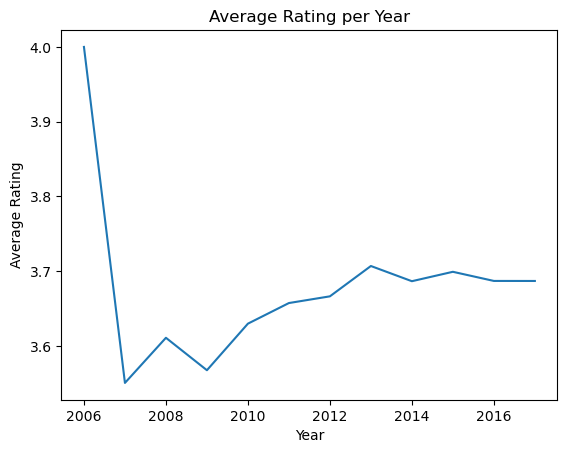

In [47]:
grouped_df = df.groupby('yearly').mean().reset_index()

# Plot line graph
plt.plot(grouped_df['yearly'], grouped_df['rating'])
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Rating per Year')
plt.show()

#### --> Result : We can See that the Average Rating has decreased drastically for the Goodread During Year 2006 to 2016. Average Rating can be said to be around = 3.5* 

## --> Plotting the graph for the number of users according to the year to find the popularity ratio for the Goodread

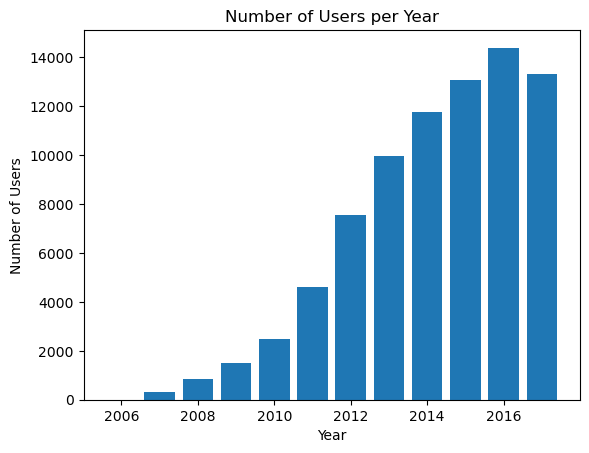

In [48]:
grouped_df = df.groupby('yearly')['user_id'].nunique().reset_index()

# Plot bar graph
plt.bar(grouped_df['yearly'], grouped_df['user_id'])
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.title('Number of Users per Year')
plt.show()

#### --> Result :- Number of Users showed constant increase in the amount till Year 2016 but after that it showed slight decine for the upcoming year.

## --> Plotting the graph for the number of users with & without spoilers per Year 

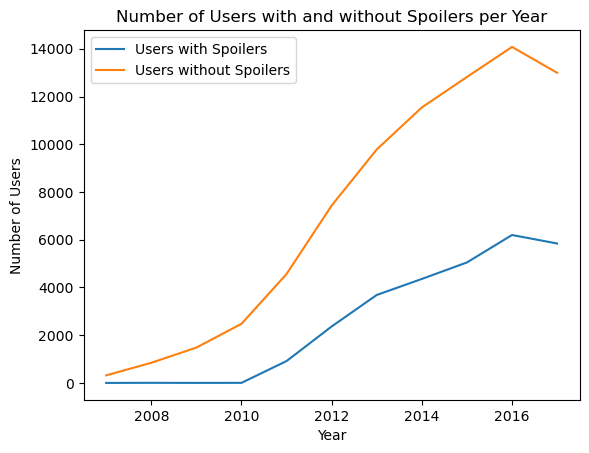

In [49]:
grouped_df = df.groupby(['yearly', 'has_spoiler'])['user_id'].nunique().reset_index()

# Separate the two groups into two different data frames
has_spoiler = grouped_df[grouped_df['has_spoiler'] == 1]
no_spoiler = grouped_df[grouped_df['has_spoiler'] == 0]

# Merge the two data frames on 'yearly' column
merged_df = pd.merge(has_spoiler, no_spoiler, on='yearly')

# Plot line graph
plt.plot(merged_df['yearly'], merged_df['user_id_x'], label='Users with Spoilers')
plt.plot(merged_df['yearly'], merged_df['user_id_y'], label='Users without Spoilers')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.title('Number of Users with and without Spoilers per Year')
plt.legend()
plt.show()

#### --> Result :- Number of users with Spoilers showed quite a bit of increase till Year 2016 but for the upcoming year the Slope is going down which shows the decrease in the people who provided reviews with spoilers for the upcoming Year. Moreover, Users without spoilers showed rapid increase till year 2016 which now has dropped and decreased to around 13000 users (Before it was 14000) for the Upcoming Year.

#### --> Finding which year had the highest reviews & among those how many were with spoilers & without spoilers 

In [50]:
year_with_most_reviews = df['yearly'].value_counts().idxmax()

# Get the number of reviews with and without spoilers for that year
num_reviews_with_spoilers = df[(df['yearly'] == year_with_most_reviews) & (df['has_spoiler'] == 1)].shape[0]
num_reviews_without_spoilers = df[(df['yearly'] == year_with_most_reviews) & (df['has_spoiler'] == 0)].shape[0]

# Print the results
print(f"The year with the most reviews is {year_with_most_reviews}")
print(f"Number of reviews with spoilers: {num_reviews_with_spoilers}")
print(f"Number of reviews without spoilers: {num_reviews_without_spoilers}")

The year with the most reviews is 2016
Number of reviews with spoilers: 21068
Number of reviews without spoilers: 260867


#### --> Plotting the Bar for the reviews in 2016, with spoilers & without spoilers

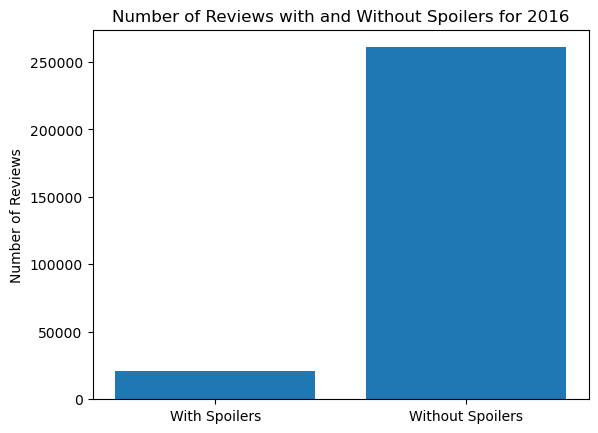

In [51]:
plt.bar(['With Spoilers', 'Without Spoilers'], [num_reviews_with_spoilers, num_reviews_without_spoilers])
plt.title(f"Number of Reviews with and Without Spoilers for {year_with_most_reviews}")
plt.ylabel('Number of Reviews')
plt.show()

#### -->  Result :- The year with the highest review is 2016 & the bar chart shows that reviews without spoliers amounted more which are around 250000 while reviews with spoilers were around 25000

In [52]:
df.head()

,user_id,timestamp,rating,has_spoiler,first_sentence,second_sentence,yearly,monthly
0,8842281e1d1347389f2ab93d60773d4d,2017-08-30,5,1,"[0, This is a special book.]","[0, It started slow for about the first third,...",2017,2017-08
1,8842281e1d1347389f2ab93d60773d4d,2017-03-22,3,0,"[0, Recommended by Don Katz.]","[0, Avail for free in December: http://www.aud...",2017,2017-03
2,8842281e1d1347389f2ab93d60773d4d,2017-03-20,3,1,"[0, A fun, fast paced science fiction thriller.]","[0, I read it in 2 nights and couldn't put it ...",2017,2017-03
3,8842281e1d1347389f2ab93d60773d4d,2016-11-09,0,0,"[0, Recommended reading to understand what is ...","[0, http://www.npr.org/2016/11/09/5013826...]",2016,2016-11
4,8842281e1d1347389f2ab93d60773d4d,2016-04-25,4,1,"[0, I really enjoyed this book, and there is a...","[0, It did drag on a little at the end so I kn...",2016,2016-04


In [53]:
df.to_csv('data.csv', index=False)

In [54]:

total_ratings = df['rating'].count()

print(f"Total number of ratings: {total_ratings}")

Total number of ratings: 1378033
